<a href="https://colab.research.google.com/github/saharshwadekar/googleColabNotebook/blob/main/LandmarkDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import keras
import cv2
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf
from PIL import Image

In [ ]:
# base_path= baseDir = './images/'  #folder where the images files are stored
base_path= baseDir = '/content/drive/MyDrive/Colab Notebooks/LandMark Detection/image/'

In [ ]:
trainData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LandMark Detection/train.csv")
print(trainData)

                       id                                                url  \
0        6e158a47eb2ca3f6  https://upload.wikimedia.org/wikipedia/commons...   
1        202cd79556f30760  http://upload.wikimedia.org/wikipedia/commons/...   
2        3ad87684c99c06e1  http://upload.wikimedia.org/wikipedia/commons/...   
3        e7f70e9c61e66af3  https://upload.wikimedia.org/wikipedia/commons...   
4        4072182eddd0100e  https://upload.wikimedia.org/wikipedia/commons...   
...                   ...                                                ...   
4132909  fc0f007893b11ba7  https://upload.wikimedia.org/wikipedia/commons...   
4132910  39aad18585867916  https://upload.wikimedia.org/wikipedia/commons...   
4132911  fd0725460e4ebbec  https://upload.wikimedia.org/wikipedia/commons...   
4132912  73691ae29e24ba19  https://upload.wikimedia.org/wikipedia/commons...   
4132913  8ef8dff6fc4790c2  https://upload.wikimedia.org/wikipedia/commons...   

         landmark_id  
0             14

In [ ]:
trainData.drop(columns='url', inplace=True)
trainData

,id,landmark_id
0,6e158a47eb2ca3f6,142820
1,202cd79556f30760,104169
2,3ad87684c99c06e1,37914
3,e7f70e9c61e66af3,102140
4,4072182eddd0100e,2474
...,...,...
4132909,fc0f007893b11ba7,172138
4132910,39aad18585867916,162860
4132911,fd0725460e4ebbec,191243
4132912,73691ae29e24ba19,145760


In [ ]:
df = trainData

In [ ]:
df = df.loc[df["id"].str.startswith('00', na=False),:]    # in my local use ('00','01','020')
df

,id,landmark_id
108,0036d78c05c194d9,50089
172,00c08b162f34f53f,163404
710,00e5d77c905d94a6,26066
1256,00c8dba0df4d112a,35744
1262,001cd787f1e9a803,61937
...,...,...
4131341,0069f71dc6c5dac0,51272
4131349,00f1aecb6c90b551,63972
4131698,00de9755a042c271,73064
4132109,009cb0761e9b3ce1,68657


In [ ]:
def verify_image_exists(row, base_dir):
    fname = row['id']
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    img_path = os.path.join(baseDir,f1,f2,f3, f"{row['id']}.jpg")
    return os.path.exists(img_path)

def preprocess_dataset(df, base_dir):
    mask = df.apply(lambda row: verify_image_exists(row, base_dir), axis=1)
    return df[mask].reset_index(drop=True)

# Preprocess the dataset
df = preprocess_dataset(df, baseDir)                                            # only those images in df which is exist in my dataset folder are selected
num_classes = len(df['landmark_id'].unique())
num_data = len(df)
df

,id,landmark_id
0,0036d78c05c194d9,50089
1,00c08b162f34f53f,163404
2,00e5d77c905d94a6,26066
3,00c8dba0df4d112a,35744
4,001cd787f1e9a803,61937
...,...,...
16152,0069f71dc6c5dac0,51272
16153,00f1aecb6c90b551,63972
16154,00de9755a042c271,73064
16155,009cb0761e9b3ce1,68657


In [ ]:
num_classes, num_data

(13589, 16157)

In [ ]:
data = pd.DataFrame(df['landmark_id'].value_counts())
data.reset_index(inplace=True)

In [ ]:
data

,landmark_id,count
0,138982,47
1,62798,18
2,83144,14
3,171772,13
4,176528,12
...,...,...
13584,54986,1
13585,182355,1
13586,25204,1
13587,100559,1


In [ ]:
data['count'].describe()

count    13589.000000
mean         1.188976
std          0.727458
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         47.000000
Name: count, dtype: float64

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1789e+04, 0.0000e+00,
        0.0000e+00, 1.3960e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.5400e+02, 0.0000e+00, 0.0000e+00, 7.6000e+01, 0.0000e+00,
        0.0000e+00, 3.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+01, 0.0000e+00, 0.0000e+00, 9.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

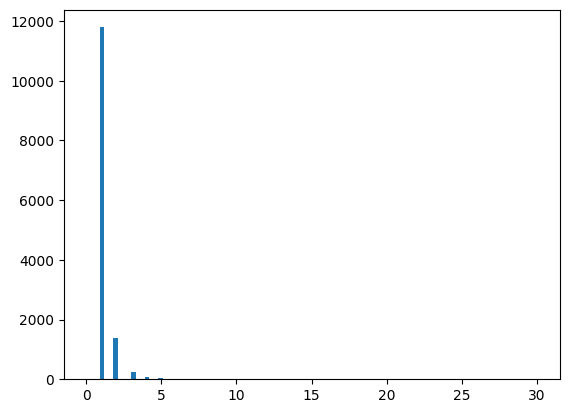

In [ ]:
plt.hist(data['count'], 100, range=(0,30), label="Ploting count histogram")

In [ ]:
data['count'].between(0,5).sum()

13549

(array([1., 1., 1., ..., 1., 1., 2.]),
 array([0.00000e+00, 2.70000e+01, 3.00000e+01, ..., 2.03062e+05,
        2.03071e+05, 2.03073e+05]),
 <BarContainer object of 13588 artists>)

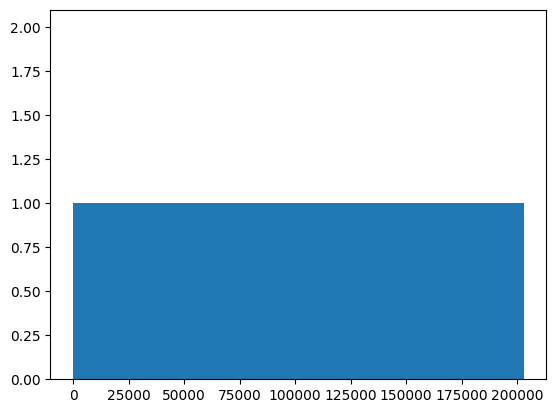

In [ ]:
ascData = data.sort_values(by='landmark_id', ascending=True)
ascData
plt.hist(ascData['landmark_id'], bins=ascData['landmark_id'].unique())
# plt.hist(data['landmark_id'], bins=data['landmark_id'].unique())

In [ ]:
#Training model
from sklearn.preprocessing import LabelEncoder
lenCoder = LabelEncoder()
lenCoder.fit(df['landmark_id'])

LabelEncoder()

In [ ]:
df.head()

,id,landmark_id
0,0036d78c05c194d9,50089
1,00c08b162f34f53f,163404
2,00e5d77c905d94a6,26066
3,00c8dba0df4d112a,35744
4,001cd787f1e9a803,61937


In [ ]:
def encode_label(label):
    return lenCoder.transform(label)

def decode_label(label):
    return lenCoder.inverse_transform(label)

In [ ]:
def getImageByNumber(number,df):
    fname, label = df.loc[number,:]
    fname = fname + ".jpg"
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    path = os.path.join(baseDir,f1,f2,f3,fname)
    im = cv2.imread(path)
    if im is None:
        raise FileNotFoundError(f"Image not found at path: {path}")
    return im, label

4 Sample images to show


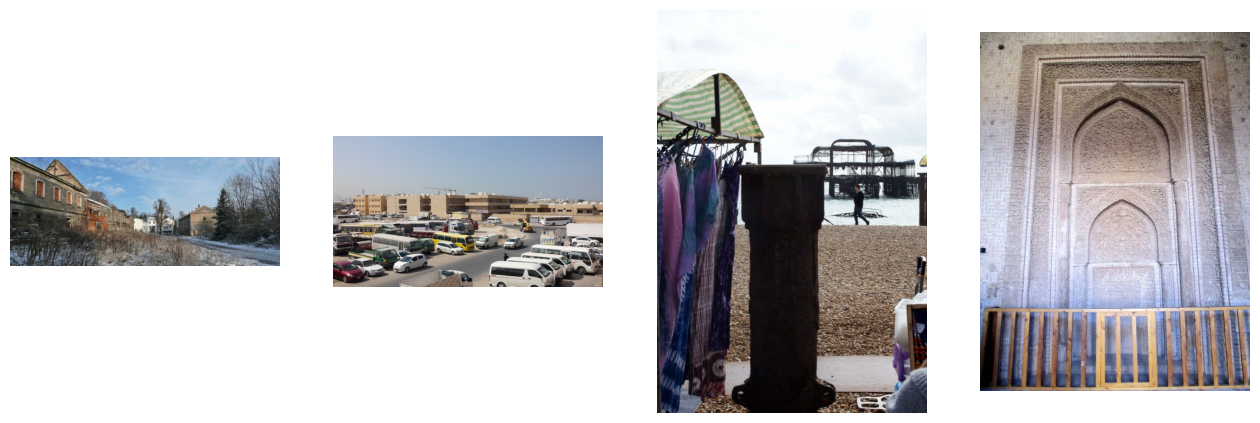

In [ ]:
print("4 Sample images to show")
fig = plt.figure(figsize=(16,16))
for i in range(1,5):
    ri = random.choices(os.listdir(baseDir), k=3)
    folder = baseDir + '/' + ri[0] + '/' + ri[1] + '/' + ri[2]
    randImg = random.choice(os.listdir(folder))
    img = np.array(Image.open(folder+'/'+randImg))
    fig.add_subplot(1,4,i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [ ]:
from keras.applications import VGG19
from keras.layers import *
from keras import Sequential
# removing eger execution due to inconvinency

In [ ]:
source_model = VGG19(weights=None)
drop_layer = Dropout(0.5)
drop_layer2 = Dropout(0.5)

In [ ]:
model = Sequential()
for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
#     if layer == source_model.layers[-3]:
#         model.add(drop_layer)
# model.add(drop_layer2)
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 224, 224, 3)       12        
 Normalization)                                                  
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                        

In [ ]:
from keras.optimizers import SGD

In [ ]:
optim1 = keras.optimizers.RMSprop(learning_rate = 0.0001, momentum = 0.09)
optim2 = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)  # we can use adams
model.compile(optimizer=optim1,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
sgd = SGD(learning_rate=0.0001,  momentum=0.09, nesterov=True)
rms = keras.optimizers.RMSprop(learning_rate=0.0001, momentum=0.09)
model.compile(optimizer=rms,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
print("Model compiled!")

Model compiled!


In [ ]:
def get_image_from_number(num, df):
    fname, label = df.iloc[num,:]
    fname = fname + ".jpg"
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    path = os.path.join(f1,f2,f3,fname)
    im = cv2.imread(os.path.join(base_path,path))
    return im, label


In [ ]:
def image_reshape(im, target_size):
    return cv2.resize(im, target_size)

In [ ]:
def get_batch(dataframe,start, batch_size):
    image_array = []
    label_array = []
    end_img = start+batch_size
    if end_img > len(dataframe):
        end_img = len(dataframe)
    for idx in range(start, end_img):
        n = idx
        im, label = get_image_from_number(n, dataframe)
        im = image_reshape(im, (224, 224)) / 255.0
        image_array.append(im)
        label_array.append(label)
    label_array = encode_label(label_array)
    return np.array(image_array), np.array(label_array)

In [ ]:
batch_size = 16     # 16
epoch_shuffle = True
weight_classes = True
epochs = 1

In [ ]:
# Split train data up into 80% and 20% validation
train, validate = np.split(df.sample(frac=1), [int(.8*len(df))])
print("Training on:", len(train), "samples")
print("Validation on:", len(validate), "samples")
for e in range(epochs):
    print("Epoch: ", str(e+1) + "/" + str(epochs))
    if epoch_shuffle:
        train = train.sample(frac = 1)
    for it in range(int(np.ceil(len(train)/batch_size))):
        X_train, y_train = get_batch(train, it*batch_size, batch_size)
        model.train_on_batch(X_train, y_train)
model.save("Model.h5")

Training on: 12925 samples
Validation on: 3232 samples
Epoch:  1/1


KeyboardInterrupt: 

In [ ]:
batch_size = 16
errors = 0
good_preds = []
bad_preds = []
for it in range(int(np.ceil(len(validate)/batch_size))):
    X_train, y_train = get_batch(validate, it*batch_size, batch_size)
    result = model.predict(X_train)
    cla = np.argmax(result, axis=1)
    for idx, res in enumerate(result):
        print("Class:", cla[idx], "- Confidence:", np.round(res[cla[idx]],2), "- GT:", y_train[idx])
        if cla[idx] != y_train[idx]:
            errors = errors + 1
            bad_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])
        else:
            good_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])
print("Errors: ", errors, "Acc:", np.round(100*(len(validate)-errors)/len(validate),2))

In [ ]:
#Good predictions
good_preds = np.array(good_preds)
good_preds = np.array(sorted(good_preds, key = lambda x: x[2], reverse=True))

In [ ]:
fig=plt.figure(figsize=(16, 16))
for i in range(1,6):
    n = int(good_preds[i,0])
    img, lbl = get_image_from_number(n, validate)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(1, 5, i)
    plt.imshow(img)
    lbl2 = np.array(int(good_preds[i,1])).reshape(1,1)
    sample_cnt = list(df.landmark_id).count(lbl)
    plt.title("Label: " + str(lbl) + "nClassified as: " + str(decode_label(lbl2)) + "nSamples in class " + str(lbl) + ": " + str(sample_cnt))
    plt.axis('off')
plt.show()